# Explore here

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#EDA

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome',axis=1)
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [8]:
from sklearn.tree import DecisionTreeClassifier

model =DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

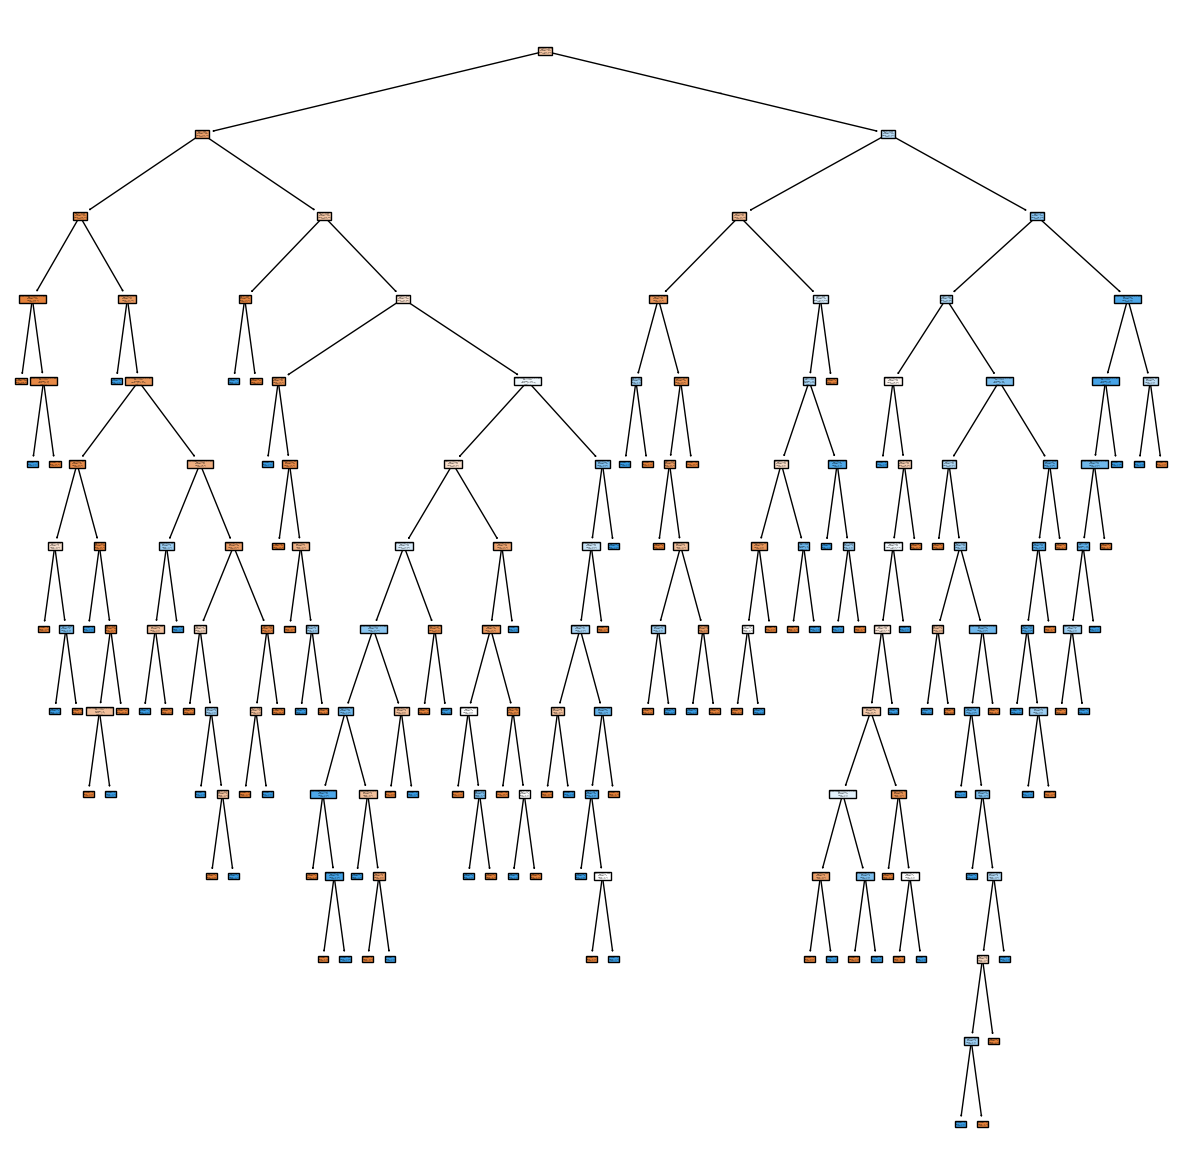

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()


In [10]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7467532467532467

In [12]:
model1 = DecisionTreeClassifier(random_state=42,criterion='entropy')
model2 = DecisionTreeClassifier(random_state=42,criterion='log_loss')

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

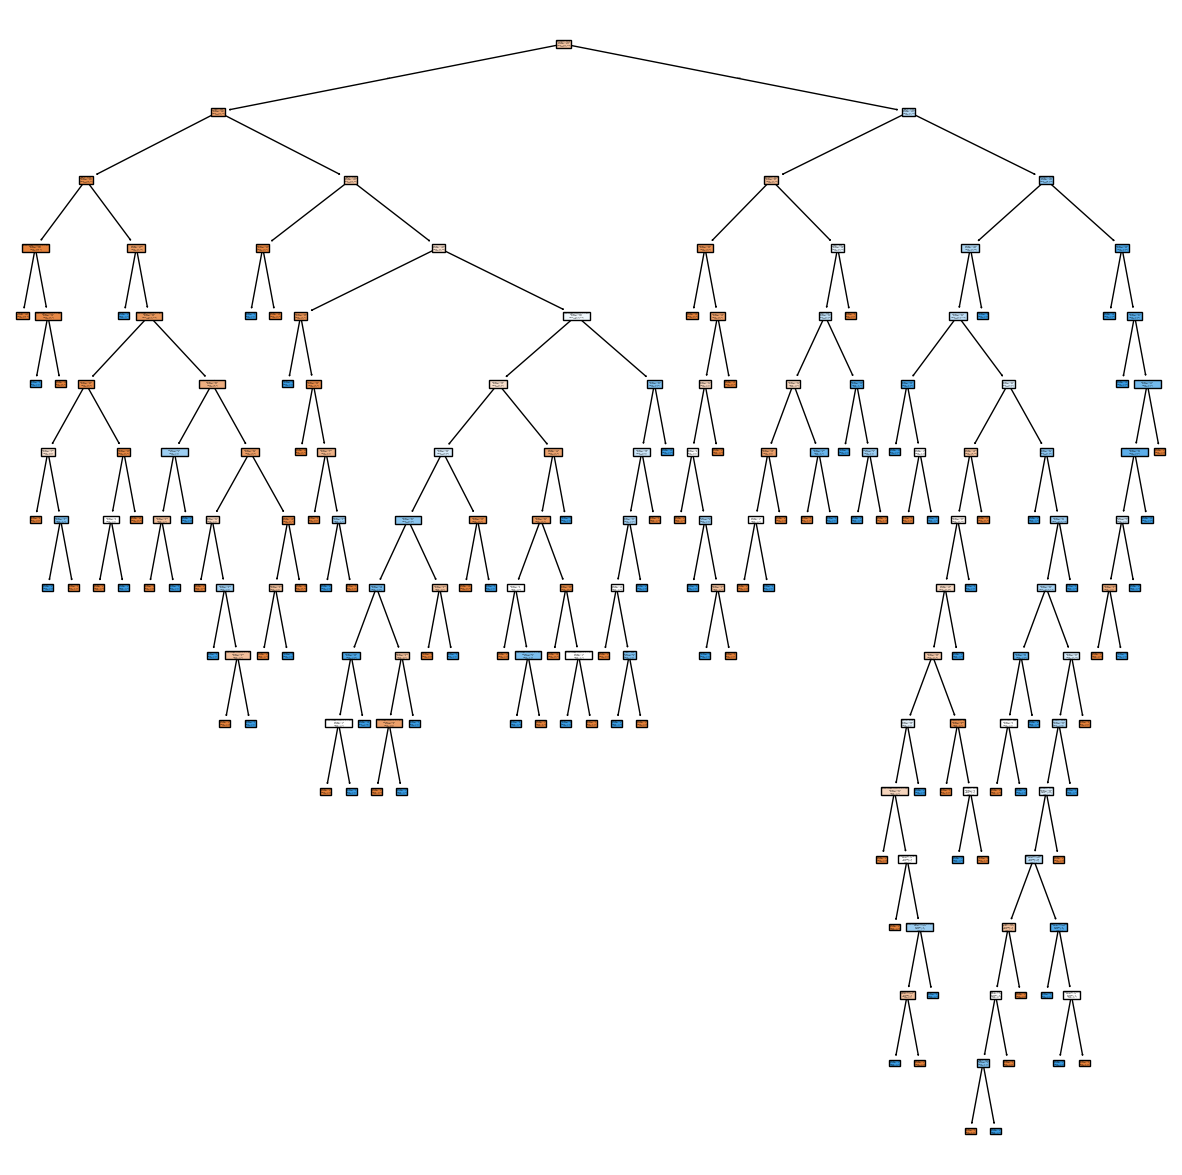

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model1, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()


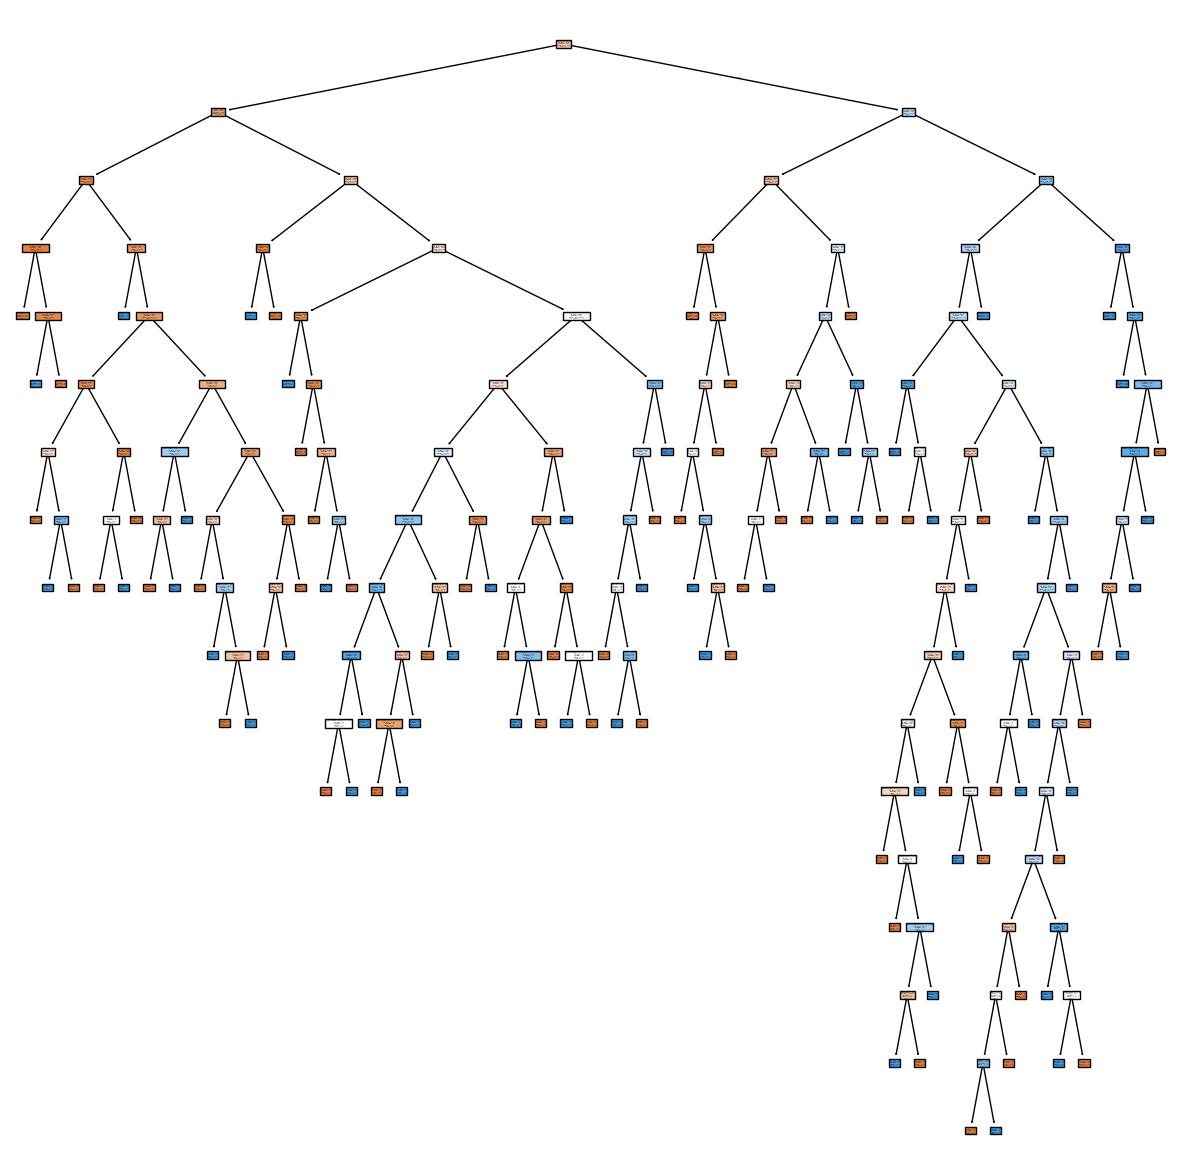

In [14]:

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model2, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()


In [15]:
y_pred_entropy = model1.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy))
y_pred_log_loss = model2.predict(X_test)
print(accuracy_score(y_test,y_pred_log_loss))

0.7207792207792207
0.7207792207792207


In [16]:
DecisionTreeClassifier()
grid = {
    'criterion' : ['gini','log_loss','entropy'],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [1,2,4,6,8],
    'max_features' : ['auto','sqrt','log2',2,3,4,5]
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model,grid,scoring='accuracy')
clf.fit(X_train,y_train)

best_model = clf.best_estimator_

print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'log_loss', 'max_features': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.760575769692123


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

In [17]:
model.feature_importances_

array([0.05748153, 0.31422474, 0.14767907, 0.06116378, 0.06625279,
       0.17070035, 0.08328237, 0.09921536])

In [18]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [19]:
from pickle import dump

dump(best_model, open('../models/decision_tree_classifier_metrics_42.sav', 'wb'))